In [4]:
import tensorflow as tf

In [5]:
from tensorflow import keras

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [7]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()


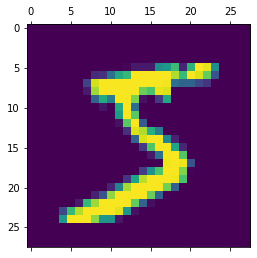

In [8]:
plt.matshow(x_train[0])

In [9]:
x_train=x_train/255
x_test=x_test/255

In [10]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6536 - accuracy: 0.8355 - val_loss: 0.3601 - val_accuracy: 0.9036
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3361 - accuracy: 0.9056 - val_loss: 0.2927 - val_accuracy: 0.9213
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2872 - accuracy: 0.9180 - val_loss: 0.2608 - val_accuracy: 0.9272
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2561 - accuracy: 0.9269 - val_loss: 0.2353 - val_accuracy: 0.9343
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2326 - accuracy: 0.9337 - val_loss: 0.2162 - val_accuracy: 0.9386
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2138 - accuracy: 0.9388 - val_loss: 0.2022 - val_accuracy: 0.9422
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1983 - accuracy: 0.9439 - val_loss: 0.1901 - val_accuracy:

In [16]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1619 - accuracy: 0.9528
Loss=0.162
Accuracy=0.953


<function matplotlib.pyplot.show(close=None, block=None)>

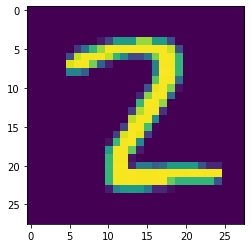

In [17]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show

In [18]:
test_predict=model.predict(x_test)
test_predict_labels=np.argmax(test_predict,axis=1)
confusion_matrix=tf.math.confusion_matrix(labels=y_test,predictions=test_predict_labels)
print('confusion matrix of the test set :\n', confusion_matrix)

313/313 [==============================] - 1s 2ms/step
confusion matrix of the test set :
 tf.Tensor(
[[ 967    0    1    1    0    4    4    2    1    0]
 [   0 1117    3    2    0    1    3    2    7    0]
 [   7    1  992    4    7    1    5    6    7    2]
 [   0    1   14  960    0   11    0    8   11    5]
 [   1    1    9    0  930    0   10    3    3   25]
 [   9    2    1   23    2  824    9    1   14    7]
 [   9    3    3    0    9    8  920    1    5    0]
 [   2    8   22    7    4    2    0  962    2   19]
 [   5    2    6   15    6    6    9    6  914    5]
 [   7    8    2   12   21    2    1    7    7  942]], shape=(10, 10), dtype=int32)
